### Öğrenci Adı: Sait Ali Uymaz
### Öğrenci No : 951213002

#### Veri Seti: Titanic
#### Görev: Hayatta Kalma tahmini (0:Hayır, 1:Evet)

#### !!!! Bu doküman ödevlerinizi yaparken size yol göstermesi için hazırlanmıştır. !!!

In [2]:
# Kullanılan temel kütüphaneler
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("datasets/titanic/train.csv")

### Veri Analizi

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.shape

(891, 12)

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Sınıflandırma için kullanılmayacak niteliklerin verisetinden çıkarılması
df = df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


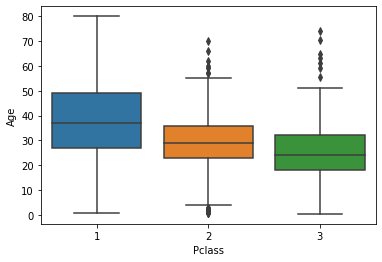

In [25]:
sns.boxplot(x='Pclass', y="Age", data=df);

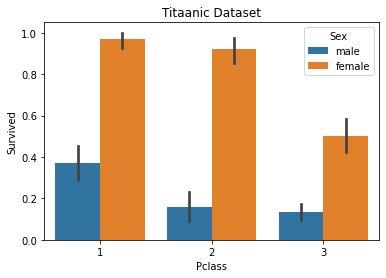

In [26]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df).set_title("Titaanic Dataset");

### Data Pre-processing

In [12]:
df.isnull().sum()  # Eksik veri kontrolü

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [28]:
df['Embarked'].value_counts() # Bir nitelik için En sık geçen sınıfı bulma

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
df['Embarked'] = df['Embarked'].fillna("S") # Eksik verileri sabit bir değer ile tamamlama

In [15]:
from sklearn.preprocessing import LabelEncoder # Kategorik verileri dönüştürme

In [16]:
LE = LabelEncoder()
df['Sex_Cat'] = LE.fit_transform(df['Sex'])
df['Embarked_Cat'] = LE.fit_transform(df['Embarked'])

In [17]:
df.drop(["Sex","Embarked"], axis=1, inplace=True)

In [18]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2
887,1,1,19.0,0,0,30.0000,0,2
888,0,3,NaN,1,2,23.4500,0,2
889,1,1,26.0,0,0,30.0000,1,0


In [33]:
 from sklearn.impute import KNNImputer  # Eksik verileri KNN algoritması ile tamamlama
 imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
 imputer.fit(df)
 df[:] = imputer.transform(df)

In [34]:
from sklearn.preprocessing import KBinsDiscretizer # Sürekli Verileri düzleştirme

In [35]:
Xbin = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile') # Yaş niteliğini 4 değerden oluşan kategorik veriye dönüştürme
df["Age"] = Xbin.fit_transform(df[["Age"]])

In [36]:
df ## Makine Öğrenimi Algoritmasının uygulanacağı veri seti

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Cat,Embarked_Cat
0,0.0,3.0,1.0,1.0,0.0,7.2500,1.0,2.0
1,1.0,1.0,3.0,1.0,0.0,71.2833,0.0,0.0
2,1.0,3.0,1.0,0.0,0.0,7.9250,0.0,2.0
3,1.0,1.0,2.0,1.0,0.0,53.1000,0.0,2.0
4,0.0,3.0,2.0,0.0,0.0,8.0500,1.0,2.0
...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,0.0,0.0,13.0000,1.0,2.0
887,1.0,1.0,0.0,0.0,0.0,30.0000,0.0,2.0
888,0.0,3.0,1.0,1.0,2.0,23.4500,0.0,2.0
889,1.0,1.0,1.0,0.0,0.0,30.0000,1.0,0.0


### Prepare train & test set

In [37]:
X = df.loc[:,"Pclass":]  # Sadece niteliklerden oluşan Veriseti
y = df.loc[:,"Survived"] # Sınıf etiketi

In [38]:
#Veri seti %70 train, %30 test olarak bölmek
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [39]:
# Gradient Boosting Algoritması ile modelin eğitilmesi
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
# Modelin test verisi ile sınıflandırma yapması
y_test_gb = gb_model.predict(X_test)

In [41]:
# Modelin Sınıflandırma tahmin başarısının gösterilmesi
from sklearn.metrics import accuracy_score
acc_gb = accuracy_score(y_test, y_test_gb)
acc_gb

0.8134328358208955

### Sınıflandırıcı Modelin kaydedilip tekrar kullanılması

In [42]:
import pickle
with open('datasets/Titanic/ali.pkl', 'wb') as f:
        pickle.dump(gb_model, f)

In [43]:
gb_model_2 = pickle.load(open('datasets/Titanic/ali.pkl', 'rb'))
y_test_gb_2 = gb_model_2.predict(X_test)

In [44]:
# Modelin tahmin doğruluğunun gösterilmesi
acc_gb_2 = accuracy_score(y_test, y_test_gb_2)
acc_gb_2

0.8134328358208955

### Sonuçların Karmaşıklık Matrisi üzerinde gösterilmesi

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_gb_2, labels=[0,1]) # Sınıf etiketleri 0 ve 1

array([[144,  13],
       [ 37,  74]], dtype=int64)